<a href="https://colab.research.google.com/github/sasitha12/DSPL_IND_CW/blob/main/DSPL_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_excel("sri-lanka_political_violence_events_and_fatalities_by_month-year_as-of-23apr2025.xlsx", sheet_name=1)

In [31]:
df.shape

(184, 5)

In [32]:
df.head()

,Country,Month,Year,Events,Fatalities
0,Sri Lanka,January,2010,53,17
1,Sri Lanka,February,2010,8,2
2,Sri Lanka,March,2010,34,0
3,Sri Lanka,April,2010,22,1
4,Sri Lanka,May,2010,2,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     184 non-null    object
 1   Month       184 non-null    object
 2   Year        184 non-null    int64 
 3   Events      184 non-null    int64 
 4   Fatalities  184 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.3+ KB


In [34]:
df.columns

Index(['Country', 'Month', 'Year', 'Events', 'Fatalities'], dtype='object')

In [35]:
df.drop(columns=['Country'], inplace=True)

In [36]:
df.columns

Index(['Month', 'Year', 'Events', 'Fatalities'], dtype='object')

In [37]:
df.isnull().sum()

,0
Month,0
Year,0
Events,0
Fatalities,0


In [38]:
df[df.duplicated()]

,Month,Year,Events,Fatalities


In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
#checking number of unique values in Month column
df['Month'].nunique()

12

In [41]:
df.isnull().sum()

,0
Month,0
Year,0
Events,0
Fatalities,0


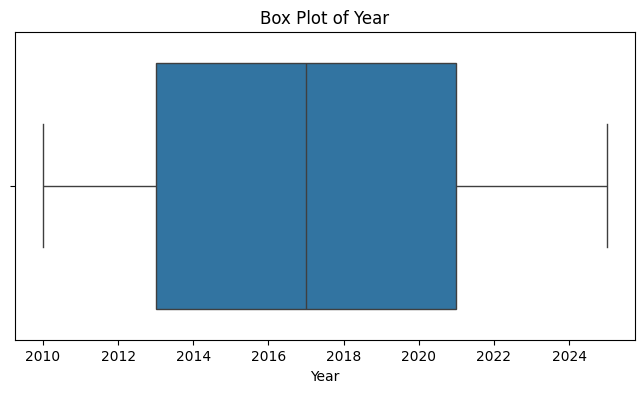

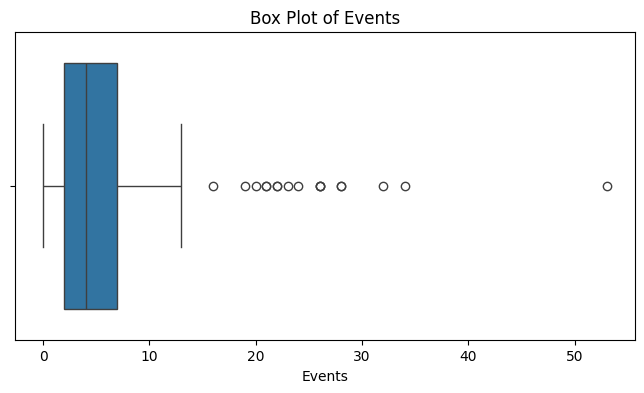

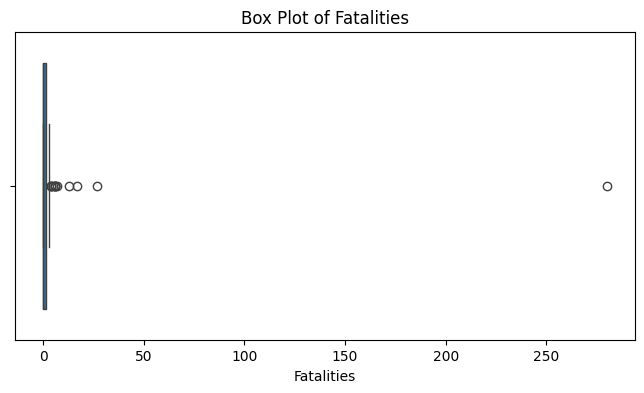

In [42]:
#creating box plots for all numerical columns
for column in df.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot of {column}')
  plt.show()

In [43]:
# Create a dictionary mapping month names to their respective quarters
month_to_quarter = {
    'January': 1, 'February': 1, 'March': 1,
    'April': 2, 'May': 2, 'June': 2,
    'July': 3, 'August': 3, 'September': 3,
    'October': 4, 'November': 4, 'December': 4
}

# Apply the mapping to the 'Month' column to get the quarter
df['Quarter'] = df['Month'].map(month_to_quarter)

In [44]:
# Create Binary Column: Is there any fatality that month?
df['Is_Fatal'] = df['Fatalities'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [45]:
# Create Cumulative Sums
df['Cumulative_Events'] = df['Events'].cumsum()
df['Cumulative_Fatalities'] = df['Fatalities'].cumsum()

In [46]:
#converting to numeric
df['Events'] = pd.to_numeric(df['Events'], errors='coerce')
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')

df[['Events', 'Fatalities']].describe()

,Events,Fatalities
count,184.000000,184.000000
mean,6.179348,2.755435
std,7.504127,20.738285
min,0.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,0.000000
75%,7.000000,1.250000
max,53.000000,280.000000


In [47]:
# Optional: Categorize Events Volume
def categorize_events(events):
    if events == 0:
        return 'No Events'
    elif events <= 10:
        return 'Low'
    elif events <= 30:
        return 'Medium'
    else:
        return 'High'

df['Events_Category'] = df['Events'].apply(categorize_events)

In [48]:
# Categorize Fatalities Volume
def categorize_fatalities(fatalities):
    if fatalities == 0:
        return 'No Fatalities'
    elif fatalities <= 5:
        return 'Low'
    elif fatalities <= 20:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create the new column
df['Fatalities_Category'] = df['Fatalities'].apply(categorize_fatalities)

In [49]:
df.to_csv('cleaned_dataset.csv', index=False)